## The Infinite Square Well
The Infinite Square Well is a potential function defined by:
$$ V(x) = \left\{\begin{array}{ll}
0, & 0\le x \le a\\
\infty, & otherwise
\end{array}
\right.$$

Hence, the time independent Schrodinger Equation takes the form:
$$-\frac{\hbar^2}{2m}\frac{\partial ^2}{\partial x^2}\psi(x) = E \psi(x)$$
Defining $k^2 = \frac{2mE}{\hbar^2}$, this can be rewritten as:
$$\frac{\partial ^2}{\partial x^2}\psi(x) = -k^2 \psi(x)$$
This is the form of the classical simple harmonic oscillator, with the solutions:
$$ \psi(x) = A\sin(kx) + B\cos(kx) $$
Since $\psi(0) = \psi(a) = 0$, this implies that $B = 0$ when $x = 0$, and thus the solutions must take the form
$$\psi(x) = A\sin(kx)$$
We ignore the trivial solutions ($k = 0, x = 0$) and note that the solutions occur for
$$k_n = \frac{n\pi}{a}, n\in\mathbb N$$
Hence we can write:
$$E_n = \frac{n^2\pi^2\hbar^2}{2ma^2}$$
This is a key result, since it demonstrates that the energy levels for a given wave function are actually discrete, as determined by the value $n$.

### Deriving the general form of the wave function for the Infinite Square Well
First, we need to normalize the wave function so that
$$\int_{-\infty}^{\infty} \left|\psi(x)\right|^2 = 1$$
$$\int_{0}^{a} \left|A\right|^2\sin^2(k_n x)dx = \left|A\right|^2\left(\frac{a}{2}-\frac{\sin(2n\pi)}{4k}\right)=1$$
where I've substituted $k_n$ into the $\sin$ term on the right to show that it will go to zero, since $n\in\mathbb N$.Deciding to take only the positive solutions, we get that
$$A^2 \frac{a}{2} = 1$$
$$A = \sqrt{\frac{2}{a}}$$
And finally, we can write the general solution to the wave function for the Infinite Square well as
$$\psi_n(x) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a}x\right)$$
Below is a plot of the wave function for several values of $n$.


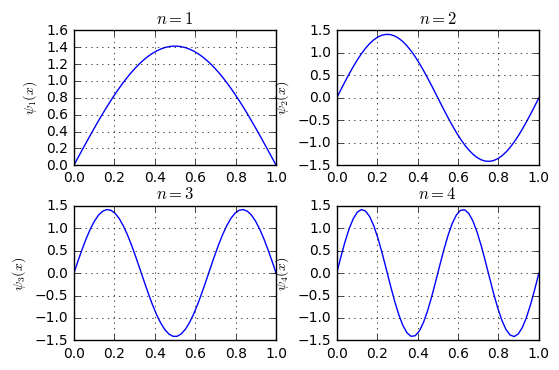

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.054571800e-34 #The value of hbar in J/s
m = 9.10938356e-31 #The mass of an electron in kg.

def squareWellSolution1d(X, n, a):
    return (np.sqrt(2./a) * np.sin(n*np.pi/a*X))

a = 1

X = np.linspace(0, a)

plt.figure(1)

n = 1
plt.subplot(221)
plt.plot(X,squareWellSolution1d(X,n,a))
plt.ylabel(r'$\psi_1(x)$')
plt.title(r'$n = 1$')
plt.grid(True)

n = 2
plt.subplot(222)
plt.plot(X,squareWellSolution1d(X,n,a))
plt.ylabel(r'$\psi_2(x)$')
plt.title(r'$n = 2$')
plt.grid(True)

n = 3
plt.subplot(223)
plt.plot(X,squareWellSolution1d(X,n,a))
plt.ylabel(r'$\psi_3(x)$')
plt.title(r'$n = 3$')
plt.grid(True)

n = 4
plt.subplot(224)
plt.plot(X,squareWellSolution1d(X,n,a))
plt.ylabel(r'$\psi_4(x)$')
plt.title(r'$n = 4$')
plt.grid(True)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

Since the wave function is dependent upon $x$ and $t$, the linearly separable solutions to the time-dependent Schrödinger equation are of the form
$$\Psi(x,t) = \psi(x)f(t),$$
where $f(t)$ can be found via separation of variables to produce an ordinary differential equation for $f$ and solving it. In the case of the Infinite Square Well, the solution to $\psi(x)$ was shown above, and thus the time-dependent form of the equation is
$$\Psi(x,t) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a}x\right)e^{(-iEt/\hbar)}$$
Since the time-dependent Schrödinger equation has the property that any linear combination of solutions is itself a solution, the separable solutions can be combined the most general solution, which is of the form
$$\Psi(x,t) = \sum_{n=1}^{\infty}c_n\psi(x)f(t)$$
$$\Psi(x,t) = \sum_{n=1}^{\infty}c_n\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a}x\right)e^{(-iEt/\hbar)}$$

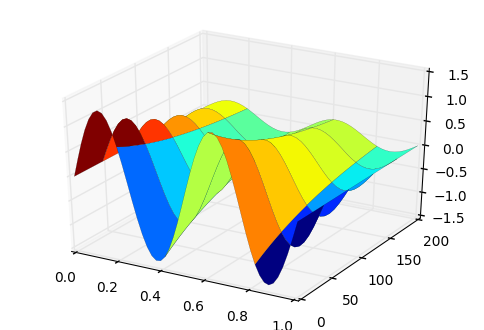

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.054571800e-34 #The value of hbar in J/s
m = 9.10938356e-31 #The mass of an electron in kg.

def squareWellEnergy(n, a):
    return ((n**2)*(np.pi**2)*(hbar**2)/(2*m*(a**2)))

def timeDependentSolution(X,T,n,a):
    E = squareWellEnergy(n,a)
    return (np.sqrt(2./a)*np.sin((n/a)*np.pi*X)*np.exp(-1*E*T/hbar))

a = 1
X = np.linspace(0, a)
n = 4
T = np.linspace(0,200)
X, T = np.meshgrid(X,T)

ax = plt.figure().gca(projection='3d')
ax.plot_surface(X,T,timeDependentSolution(X,T,n,a), cmap=plt.cm.jet, linewidth=0.1)
plt.show()